In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
import numpy as np

In [4]:
df = pd.read_csv("movie.csv")

In [5]:
df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,8580.000000,8.580000e+03,8580.000000,8580.000000,8580.000000
mean,4289.500000,1.964095e+05,29.863904,6.804031,2104.044172
std,2476.976988,2.608837e+05,53.930147,0.628188,3264.360149
min,0.000000,2.000000e+00,0.023000,5.688000,300.000000
25%,2144.750000,9.922750e+03,14.722750,6.300000,477.000000
50%,4289.500000,3.461200e+04,20.945500,6.769000,895.000000
75%,6434.250000,3.636032e+05,32.027750,7.272000,2137.500000
max,8579.000000,1.212073e+06,3011.577000,8.706000,36238.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580 entries, 0 to 8579
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8580 non-null   int64  
 1   id            8580 non-null   int64  
 2   title         8580 non-null   object 
 3   overview      8579 non-null   object 
 4   release_date  8580 non-null   object 
 5   popularity    8580 non-null   float64
 6   vote_average  8580 non-null   float64
 7   vote_count    8580 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 536.4+ KB


In [7]:

df.drop(columns = ['Unnamed: 0'], inplace = True)


In [8]:
df.shape

(8580, 7)

In [9]:
df.head()

,id,title,overview,release_date,popularity,vote_average,vote_count
0,960258,Shark Bait,A group of friends enjoying a weekend steal a ...,2022-05-13,34.679,5.697,318
1,11067,Major League II,"After losing in the ALCS the year before, the ...",1994-03-30,16.374,5.697,320
2,20856,Aliens in the Attic,A group of kids must protect their vacation ho...,2009-07-30,20.437,5.696,973
3,14098,100 Feet,After Marnie Watson kills her abusive husband ...,2008-07-22,18.927,5.696,304
4,11398,The Art of War,Neil Shaw is both agent and weapon - a critica...,2000-08-25,12.022,5.696,477


In [10]:
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'coerce')

In [11]:
df.isnull().sum()

id              0
title           0
overview        1
release_date    0
popularity      0
vote_average    0
vote_count      0
dtype: int64

In [12]:
for i in df.select_dtypes(include = 'object').columns:
    df['overview'].fillna(df['overview'].mode()[0], inplace = True)

In [13]:
df.duplicated().sum()

np.int64(199)

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.columns

Index(['id', 'title', 'overview', 'release_date', 'popularity', 'vote_average',
       'vote_count'],
      dtype='object')

In [16]:
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
id,8381.0,196530.285646,260672.714134,2.000,9944.000,34813.000,364111.000,1212073.000
popularity,8381.0,29.934390,54.449805,0.023,14.713,20.955,32.077,3011.577
vote_average,8381.0,6.810240,0.627766,5.688,6.300,6.778,7.279,8.706
vote_count,8381.0,2119.215726,3292.050762,300.000,477.000,895.000,2152.000,36238.000


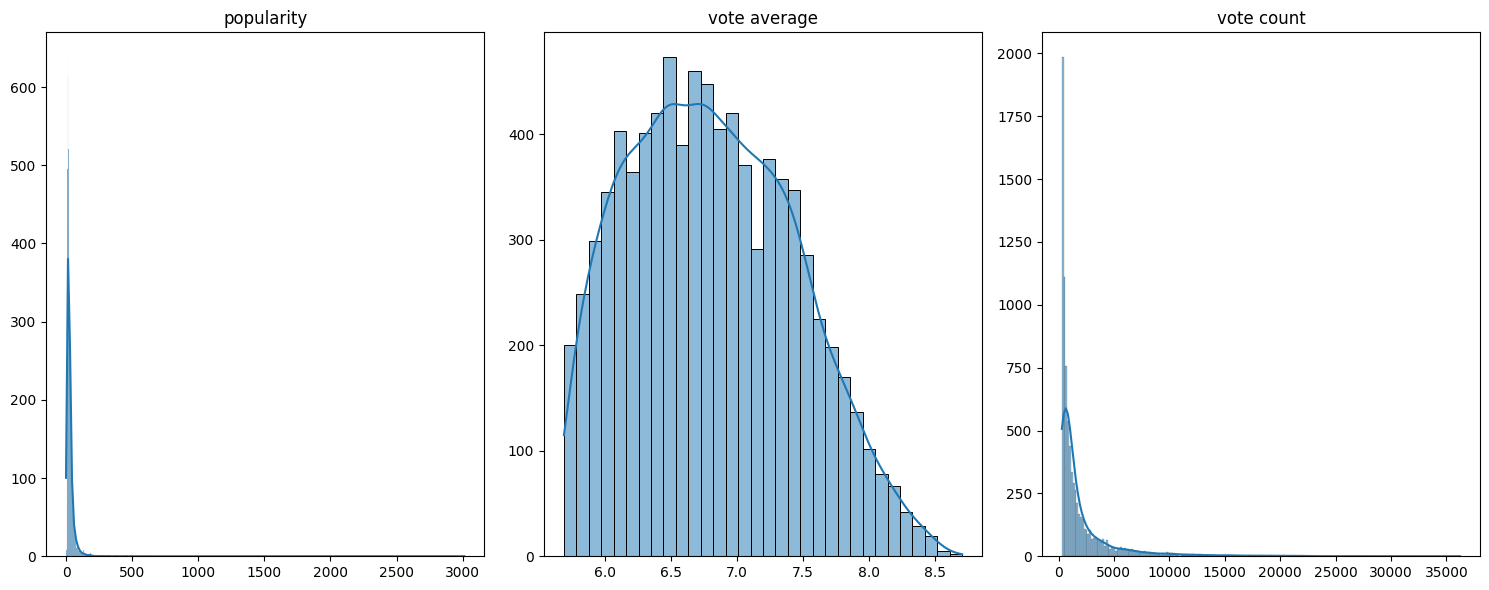

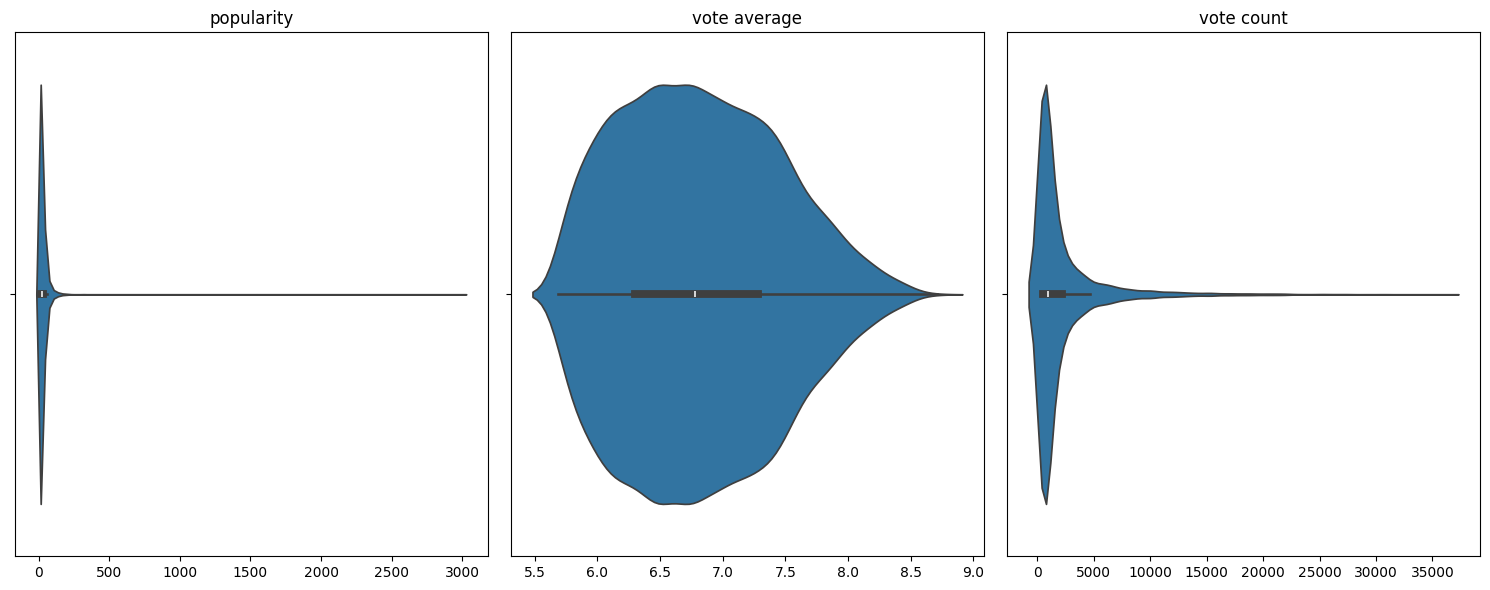

In [17]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

for i, j in enumerate(["popularity", "vote_average", "vote_count"]):
    sns.histplot(df, x=j, kde=True, ax=axes[i])
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

for i, j in enumerate(["popularity", "vote_average", "vote_count"]):
    sns.violinplot(df, x=j, ax=axes[i])
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()


In [18]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

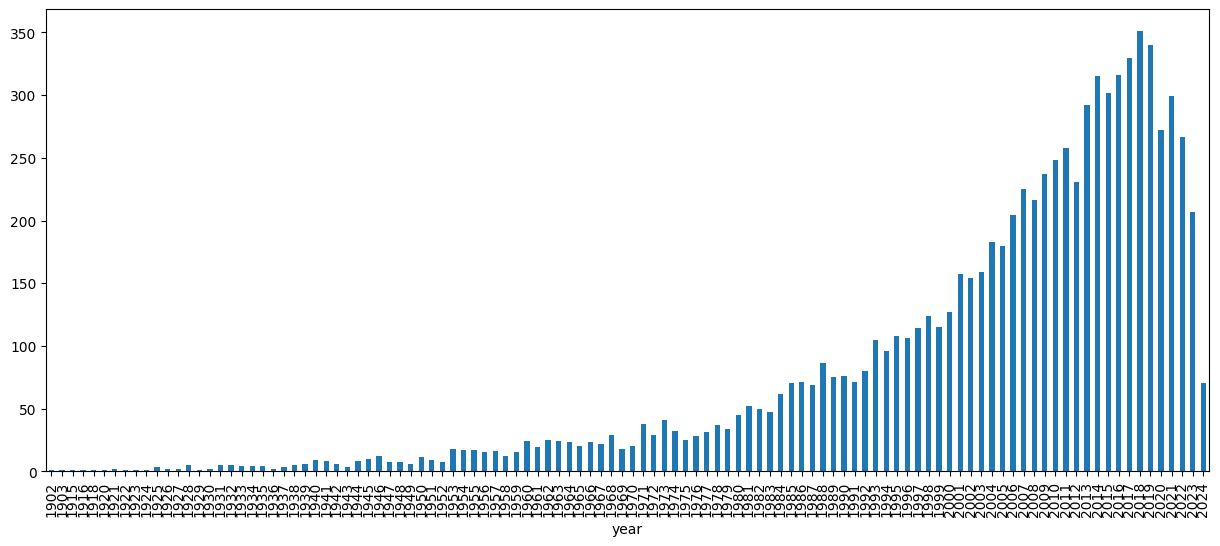

In [19]:
count = df["year"].value_counts()
count = count.sort_index(ascending=True)
fig, axes = plt.subplots(figsize=(15, 6))
count.plot(kind="bar", ax=axes)
plt.show()

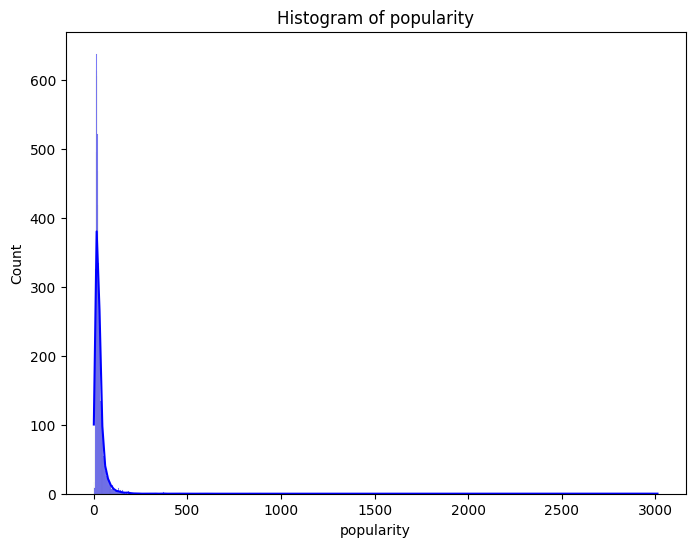

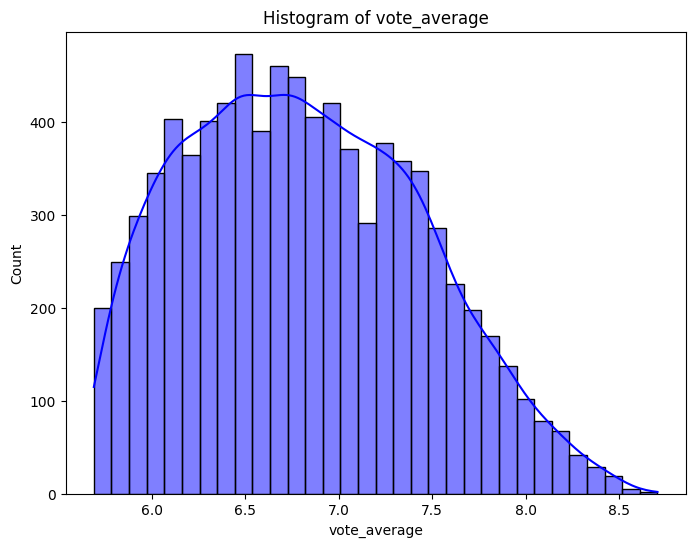

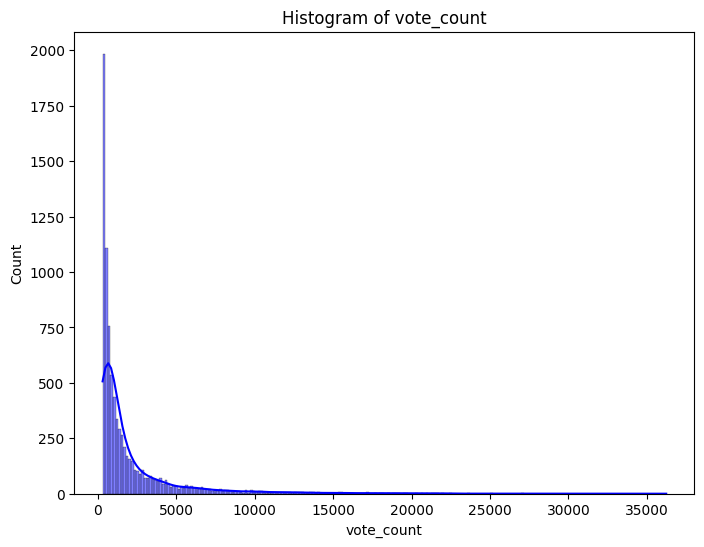

In [20]:
for i in ['popularity', 'vote_average', 'vote_count']:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=i, kde=True, color='blue')
    plt.title(f'Histogram of {i}')
    plt.show()


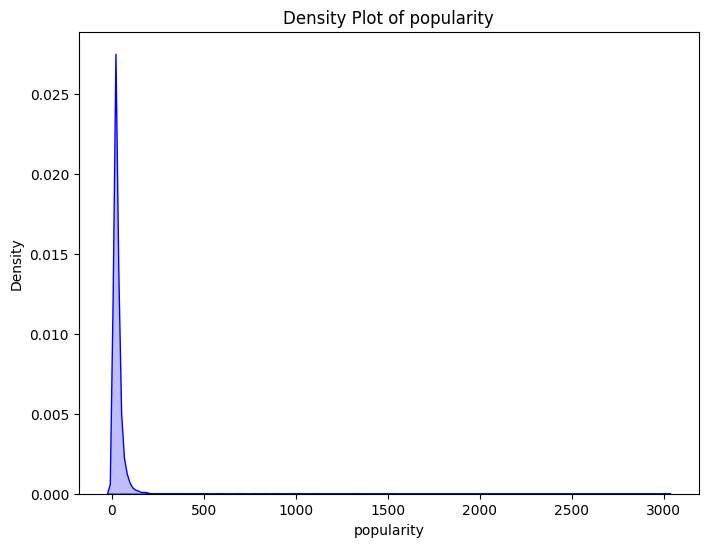

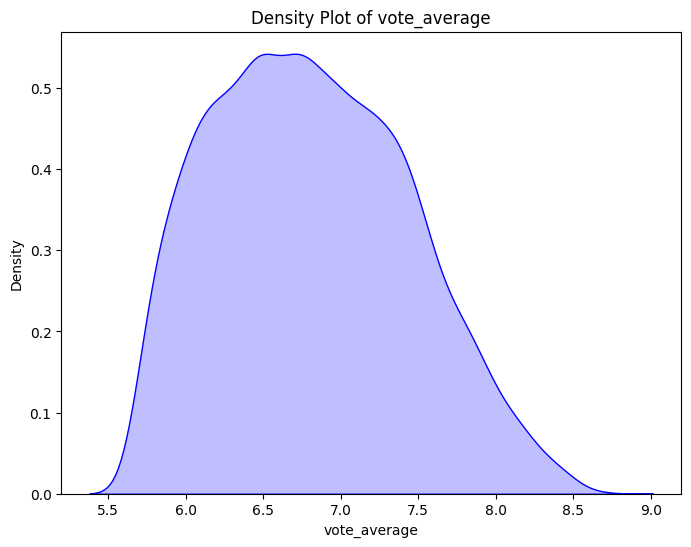

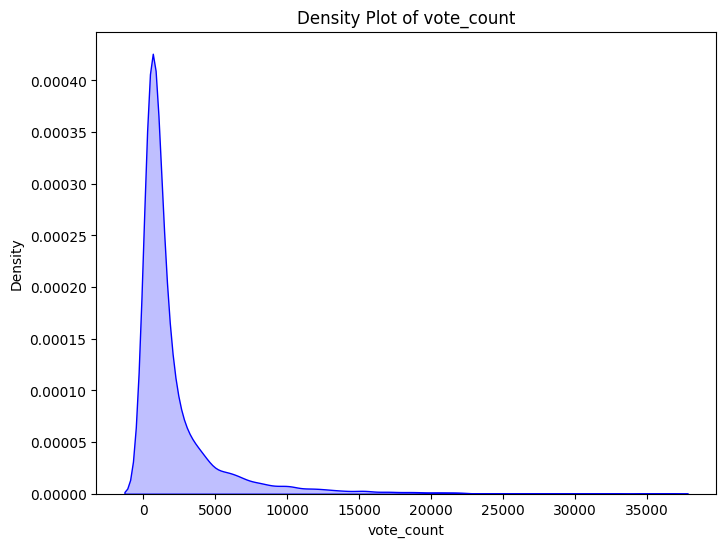

In [21]:


for i in ['popularity', 'vote_average', 'vote_count']:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=i, shade=True, color='blue')
    plt.title(f'Density Plot of {i}')
    plt.show()

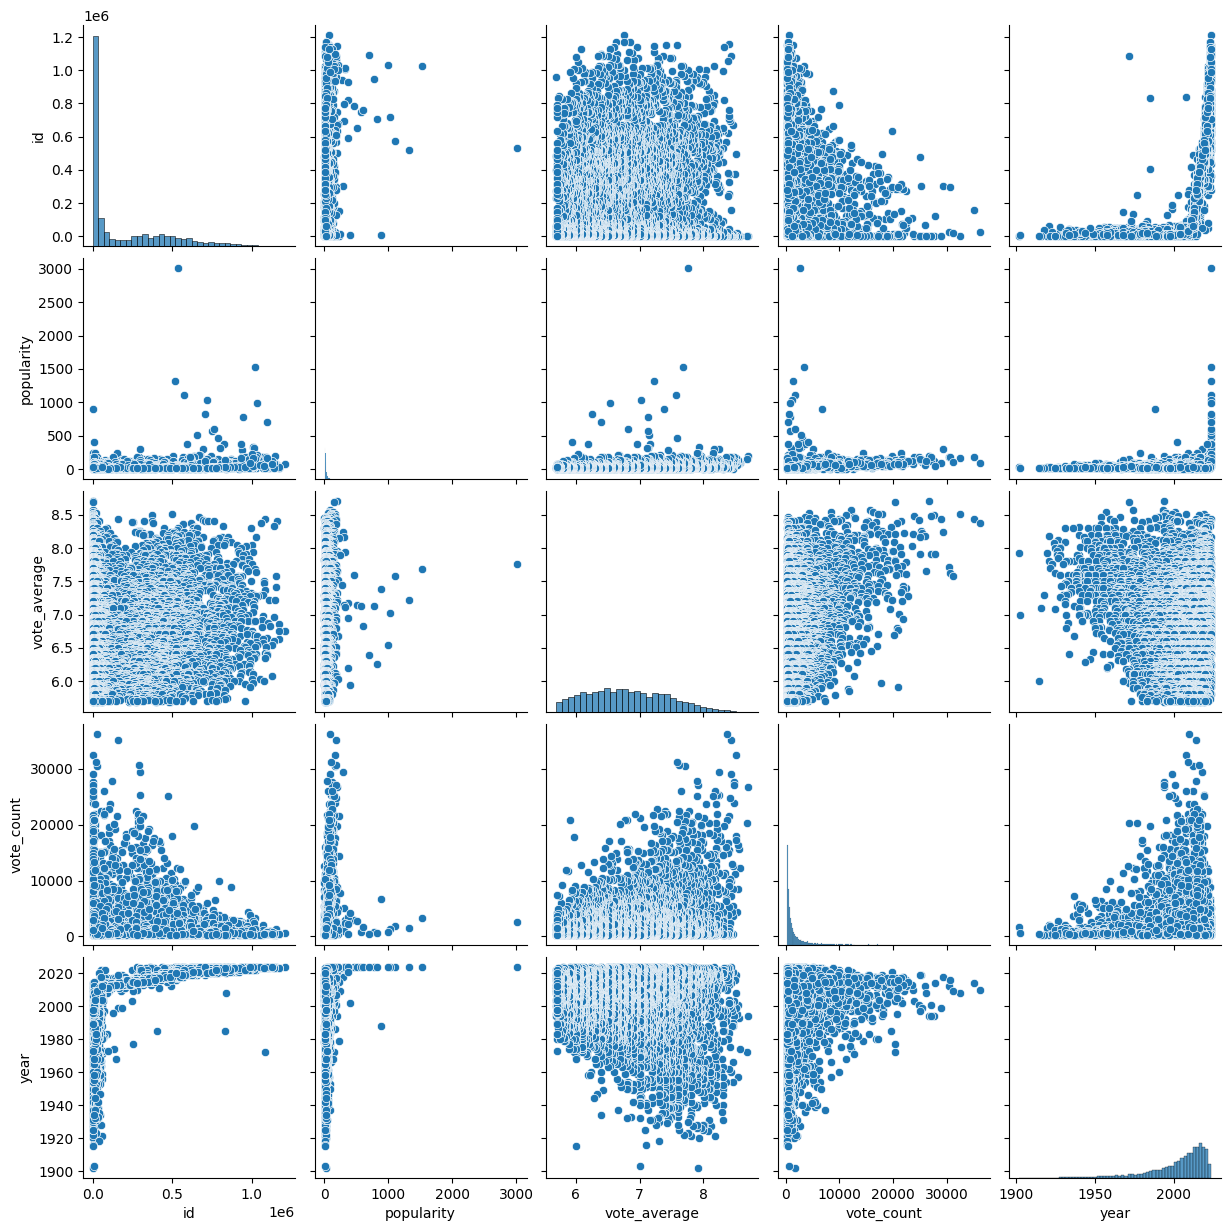

In [22]:
sns.pairplot(df)
plt.show()

In [23]:
fig = px.scatter(df, x = 'popularity',y = 'vote_count',title = 'Vote Average vs Popularity',hover_data = ['title'])
fig.show(renderer='colab')

In [32]:
df['release_year'] = df['release_date'].dt.year
fig = px.histogram(df, x='release_year', title='Distribution of Movies by Release Year')
fig.show(renderer='colab')

In [33]:
fig = px.scatter(df, 
                 x = 'vote_count', 
                 y = 'vote_average', 
                 size = 'popularity', 
                 color = 'popularity',
                  title = 'Vote Count vs Vote Average',
                 hover_data = ['title'])
fig.show(renderer='colab')

In [34]:
top_10_popular = df.nlargest(10, 'popularity')
fig = px.bar(top_10_popular, 
             x = 'title', 
             y = 'popularity', 
             title = 'Top 10 Most Popular Movies',
            text_auto = True,
            color = 'title')
fig.show(renderer='colab')

In [35]:
movies_per_year = df['release_year'].value_counts().sort_index()
fig = px.line(movies_per_year, 
              x = movies_per_year.index, 
              y = movies_per_year.values,
              labels = {'x': 'Year', 'y': 'Number of Movies'}, 
              title = 'Movies Released Per Year')
fig.show(renderer='colab')

In [36]:
top_10_votes = df.nlargest(10, 'vote_count')
fig = px.bar(top_10_votes, 
             x = 'title', 
             y = 'vote_count', 
             title = 'Top 10 Movies with Highest Vote Count')
fig.show(renderer='colab')


In [37]:
s = df.select_dtypes(include = 'number').corr()
fig = px.density_heatmap(s)
fig.update_layout(
title = 'Correlation Heatmap',
height = 600,
width = 900
)
fig.show(renderer='colab')